In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from AdvancedDataPreprocessing import TransformDataset
%matplotlib inline

In [2]:
def get_mapped(path):
    key_map, dict_idx = {}, 0
    for r, _, f in os.walk(path):
        for file in f:
            if '.JPG' in file or '.jpg' in file:
                key_map[dict_idx] = file
                dict_idx += 1
    idxs = list(key_map.keys())          
    shuffled_idxs = np.random.randint(0, len(idxs), len(idxs))
    return key_map, shuffled_idxs

from skimage import transform, feature

In [3]:
train_dir_path = 'datasets/neocr_dataset/OCR'
dict_files, files_idx = get_mapped(train_dir_path)

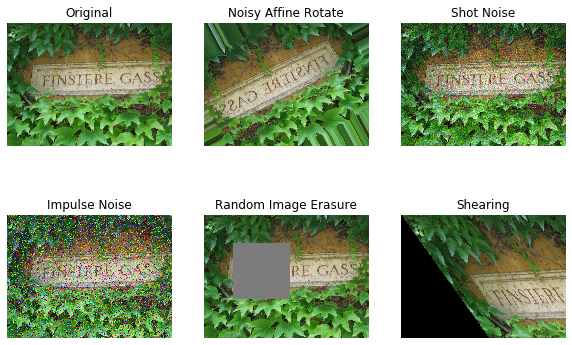

In [87]:
plt.figure(figsize=(10, 10))
im1 = plt.imread(os.path.join(train_dir_path, dict_files.get(140)))
plt.subplot(3, 3, 1)
plt.imshow(im1)
plt.title('Original')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow( TransformDataset().return_function('flip_rotate', im1, 3) )
plt.title('Noisy Affine Rotate')
plt.axis('off')
plt.subplot(3, 3, 3)
plt.imshow( TransformDataset().return_function('add_shot_noise', im1, 6) )
plt.title('Shot Noise')
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow( TransformDataset().return_function('add_impulse_noise', im1, 6) )
plt.title('Impulse Noise')
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow( TransformDataset().return_function('random_image_eraser', im1) )
plt.title('Random Image Erasure')
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(shear(im1, 4))
plt.title('Shearing')
plt.axis('off')
plt.show()